In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('D:\\M.Tech Project\\Dataset.xlsx')
data.head()

,Pull,Inflation_Pressure,CIbefore,Soil_Condition,Wheel_Load,CIafter
0,470.0,12,468.550,Soft Soil,1000,1317.67
1,490.0,12,368.180,Soft Soil,1000,1400.56
2,490.0,12,900.000,Medium Soil,1000,1459.27
3,490.0,20,1113.985,Medium Soil,1000,1794.30
4,500.0,12,418.630,Soft Soil,1000,1211.94


In [3]:
data.isna().sum()

Pull                  0
Inflation_Pressure    0
CIbefore              0
Soil_Condition        0
Wheel_Load            0
CIafter               0
dtype: int64

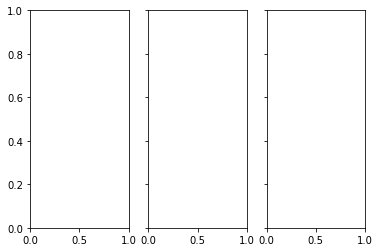

In [4]:
fig,axs = plt.subplots(1,3,sharey = True)

In [7]:
data.plot(kind = 'scatter', x = 'Pull',y = 'CIafter',ax = axs[1],figsize = (16,8))

<AxesSubplot:xlabel='Pull', ylabel='CIafter'>

In [14]:
data['Soil_Condition'].replace({'Soft Soil':0,'Medium Soil':1,'Hard Soil':2},inplace = True)

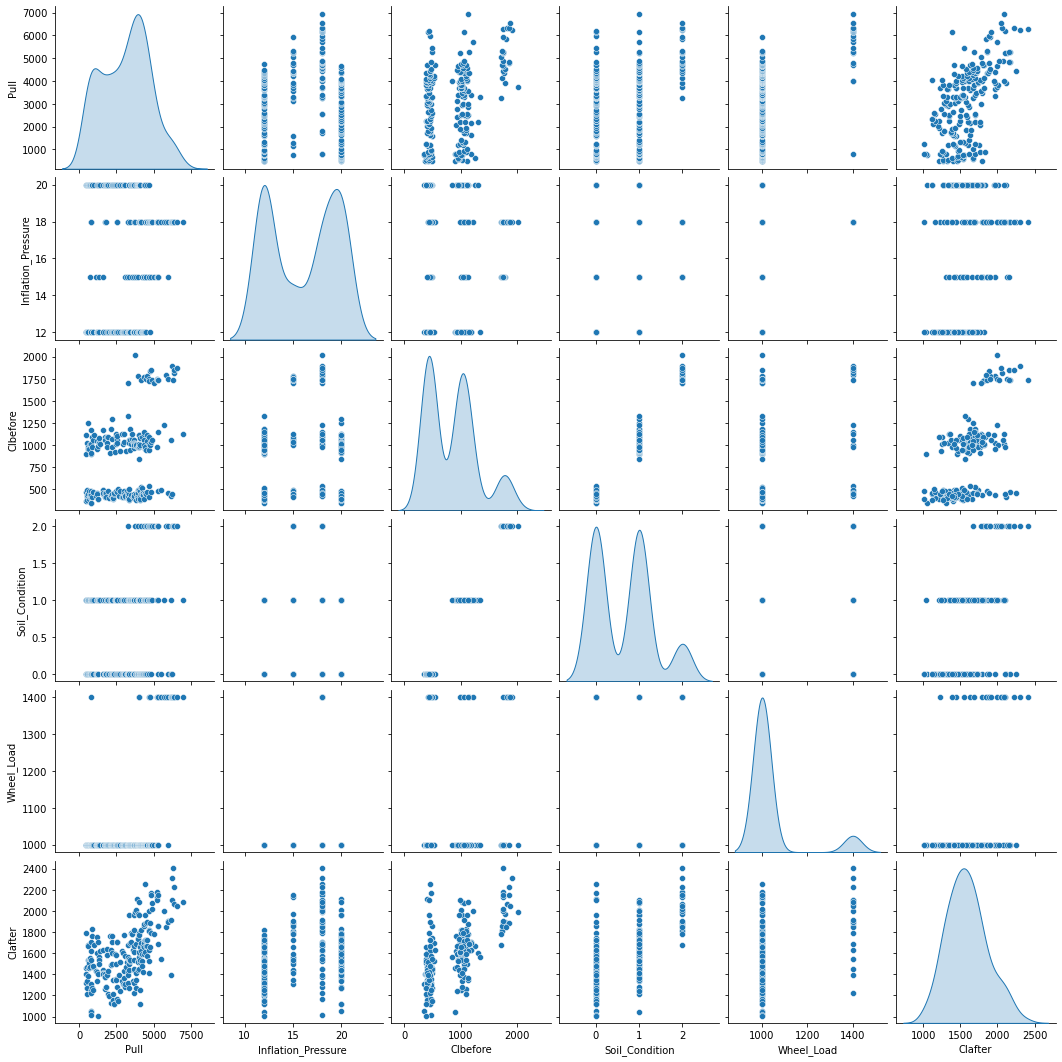

In [15]:
sns.pairplot(data[data.columns],diag_kind = "kde")

In [16]:
data.describe()

,Pull,Inflation_Pressure,CIbefore,Soil_Condition,Wheel_Load,CIafter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,3099.935592,16.022727,852.377290,0.659091,1038.181818,1590.173464
std,1600.261703,3.432910,438.993469,0.667004,117.804744,273.577028
min,470.000000,12.000000,345.000000,0.000000,1000.000000,1009.410000
25%,1746.055000,12.000000,447.245000,0.000000,1000.000000,1400.142500
50%,3311.419000,18.000000,952.500000,1.000000,1000.000000,1564.460000
75%,4247.500000,20.000000,1075.647500,1.000000,1000.000000,1761.948500
max,6950.330000,20.000000,2013.701000,2.000000,1400.000000,2406.986000


In [4]:
col_to_scale = ['Pull','Inflation_Pressure','CIbefore','Wheel_Load','Soil_Condition','CIafter']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[col_to_scale]=scaler.fit_transform(data[col_to_scale])

In [5]:
data

,Pull,Inflation_Pressure,CIbefore,Soil_Condition,Wheel_Load,CIafter
0,-1.647189,-1.174485,-0.876329,-0.990390,-0.324850,-0.998347
1,-1.634662,-1.174485,-1.105487,-0.990390,-0.324850,-0.694670
2,-1.634662,-1.174485,0.108729,0.512271,-0.324850,-0.479580
3,-1.634662,1.161214,0.597285,0.512271,-0.324850,0.747841
4,-1.628399,-1.174485,-0.990303,-0.990390,-0.324850,-1.385701
...,...,...,...,...,...,...
215,2.006672,0.577289,2.019937,2.014931,3.078342,2.992485
216,2.031056,0.577289,2.201312,2.014931,3.078342,1.735650
217,2.033982,0.577289,2.286103,2.014931,3.078342,2.339443
218,2.157447,0.577289,2.323233,2.014931,3.078342,1.659846


In [7]:
data.shape

(220, 6)

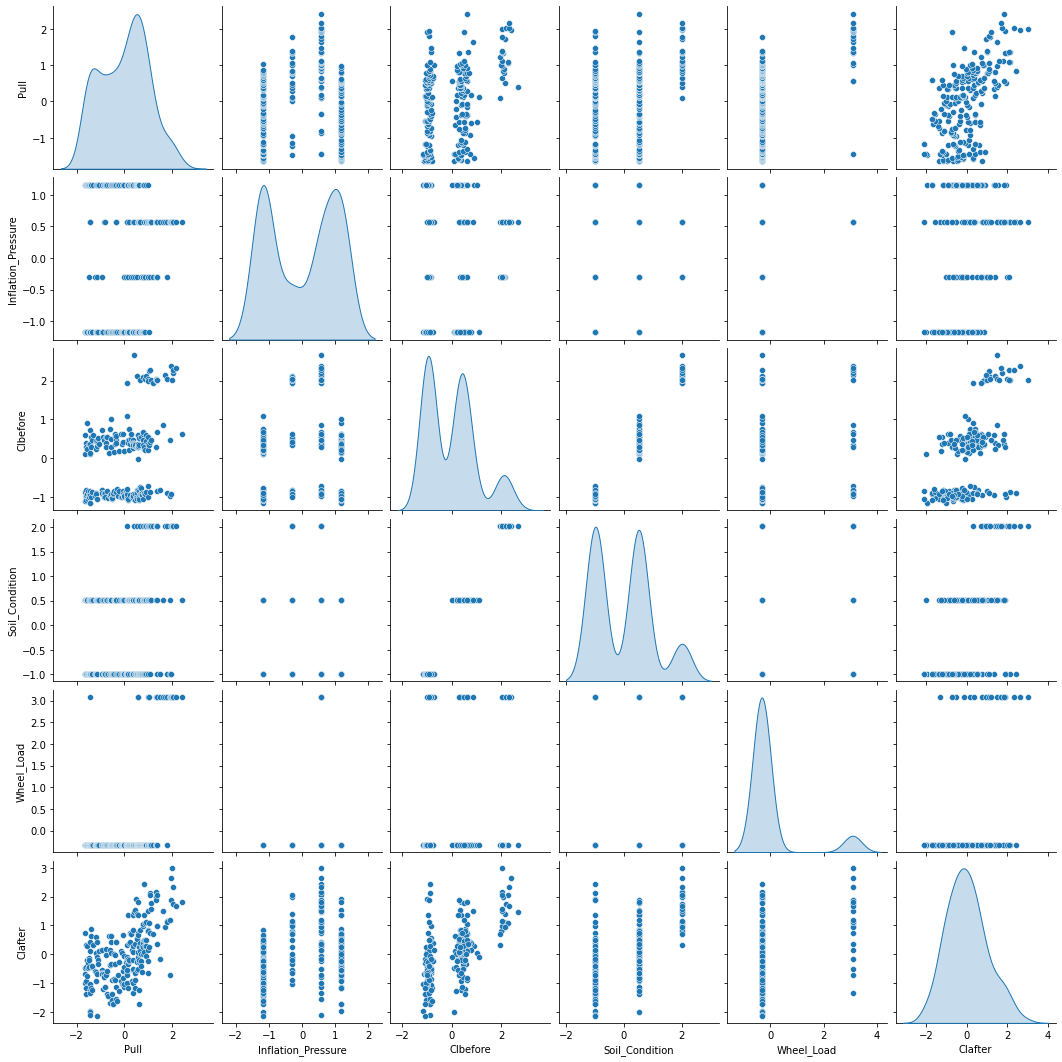

In [10]:
sns.pairplot(data[data.columns],diag_kind = "kde")

In [6]:
x = data.iloc[:,0:5]
y = data.iloc[:,5]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 15)

In [8]:
x_train.shape

(176, 5)

In [9]:
x_test.shape

(44, 5)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [12]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(8, input_shape=(5,), activation = 'relu'),
    keras.layers.Dense(6,activation = 'linear'),
    keras.layers.Dense(1,activation = 'linear'),
    
])

model.compile(optimizer = 'adam',
             loss = 'mse',
             cloning = '1e-3',
             metrics = ['mae','mse'])
model.fit(x_train,y_train)


6/6 [==============================] - 1s 7ms/step - loss: 1.5624 - mae: 1.0303 - mse: 1.5624


In [13]:
model_history = model.fit(x_train,y_train,validation_split = 0.2,epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 104ms/step - loss: 1.5057 - mae: 1.0155 - mse: 1.5057 - val_loss: 0.8668 - val_mae: 0.7500 - val_mse: 0.8668
Epoch 2/500
5/5 [==============================] - 0s 13ms/step - loss: 1.3504 - mae: 0.9597 - mse: 1.3504 - val_loss: 0.7962 - val_mae: 0.7142 - val_mse: 0.7962
Epoch 3/500
5/5 [==============================] - 0s 12ms/step - loss: 1.2189 - mae: 0.9082 - mse: 1.2189 - val_loss: 0.7366 - val_mae: 0.6810 - val_mse: 0.7366
Epoch 4/500
5/5 [==============================] - 0s 14ms/step - loss: 1.0958 - mae: 0.8558 - mse: 1.0958 - val_loss: 0.6881 - val_mae: 0.6538 - val_mse: 0.6881
Epoch 5/500
5/5 [==============================] - 0s 13ms/step - loss: 0.9954 - mae: 0.8122 - mse: 0.9954 - val_loss: 0.6490 - val_mae: 0.6324 - val_mse: 0.6490
Epoch 6/500
5/5 [==============================] - 0s 12ms/step - loss: 0.9037 - mae: 0.7699 - mse: 0.9037 - val_loss: 0.6189 - val_mae: 0.6128 - val_mse: 0.6189
Epoch 7/500
5/5 [==========

5/5 [==============================] - 0s 12ms/step - loss: 0.3503 - mae: 0.4653 - mse: 0.3503 - val_loss: 0.4516 - val_mae: 0.5091 - val_mse: 0.4516
Epoch 102/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3491 - mae: 0.4645 - mse: 0.3491 - val_loss: 0.4522 - val_mae: 0.5096 - val_mse: 0.4522
Epoch 103/500
5/5 [==============================] - 0s 11ms/step - loss: 0.3485 - mae: 0.4638 - mse: 0.3485 - val_loss: 0.4529 - val_mae: 0.5106 - val_mse: 0.4529
Epoch 104/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3480 - mae: 0.4632 - mse: 0.3480 - val_loss: 0.4550 - val_mae: 0.5130 - val_mse: 0.4550
Epoch 105/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3474 - mae: 0.4627 - mse: 0.3474 - val_loss: 0.4553 - val_mae: 0.5145 - val_mse: 0.4553
Epoch 106/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3471 - mae: 0.4620 - mse: 0.3471 - val_loss: 0.4567 - val_mae: 0.5162 - val_mse: 0.4567
Epoch 107/500
5/5 [===========

5/5 [==============================] - 0s 12ms/step - loss: 0.3321 - mae: 0.4521 - mse: 0.3321 - val_loss: 0.4470 - val_mae: 0.5182 - val_mse: 0.4470
Epoch 152/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3320 - mae: 0.4522 - mse: 0.3320 - val_loss: 0.4445 - val_mae: 0.5155 - val_mse: 0.4445
Epoch 153/500
5/5 [==============================] - 0s 11ms/step - loss: 0.3319 - mae: 0.4525 - mse: 0.3319 - val_loss: 0.4420 - val_mae: 0.5134 - val_mse: 0.4420
Epoch 154/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3313 - mae: 0.4517 - mse: 0.3313 - val_loss: 0.4423 - val_mae: 0.5127 - val_mse: 0.4423
Epoch 155/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3318 - mae: 0.4516 - mse: 0.3318 - val_loss: 0.4425 - val_mae: 0.5117 - val_mse: 0.4425
Epoch 156/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3310 - mae: 0.4504 - mse: 0.3310 - val_loss: 0.4421 - val_mae: 0.5125 - val_mse: 0.4421
Epoch 157/500
5/5 [===========

5/5 [==============================] - 0s 14ms/step - loss: 0.3239 - mae: 0.4460 - mse: 0.3239 - val_loss: 0.4309 - val_mae: 0.5129 - val_mse: 0.4309
Epoch 202/500
5/5 [==============================] - 0s 13ms/step - loss: 0.3238 - mae: 0.4462 - mse: 0.3238 - val_loss: 0.4285 - val_mae: 0.5120 - val_mse: 0.4285
Epoch 203/500
5/5 [==============================] - 0s 13ms/step - loss: 0.3237 - mae: 0.4470 - mse: 0.3237 - val_loss: 0.4267 - val_mae: 0.5112 - val_mse: 0.4267
Epoch 204/500
5/5 [==============================] - 0s 22ms/step - loss: 0.3243 - mae: 0.4474 - mse: 0.3243 - val_loss: 0.4275 - val_mae: 0.5113 - val_mse: 0.4275
Epoch 205/500
5/5 [==============================] - 0s 20ms/step - loss: 0.3236 - mae: 0.4470 - mse: 0.3236 - val_loss: 0.4269 - val_mae: 0.5111 - val_mse: 0.4269
Epoch 206/500
5/5 [==============================] - 0s 20ms/step - loss: 0.3237 - mae: 0.4471 - mse: 0.3237 - val_loss: 0.4265 - val_mae: 0.5108 - val_mse: 0.4265
Epoch 207/500
5/5 [===========

5/5 [==============================] - 0s 10ms/step - loss: 0.3196 - mae: 0.4444 - mse: 0.3196 - val_loss: 0.4194 - val_mae: 0.5090 - val_mse: 0.4194
Epoch 252/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3196 - mae: 0.4447 - mse: 0.3196 - val_loss: 0.4200 - val_mae: 0.5098 - val_mse: 0.4200
Epoch 253/500
5/5 [==============================] - 0s 14ms/step - loss: 0.3192 - mae: 0.4443 - mse: 0.3192 - val_loss: 0.4205 - val_mae: 0.5092 - val_mse: 0.4205
Epoch 254/500
5/5 [==============================] - 0s 14ms/step - loss: 0.3191 - mae: 0.4441 - mse: 0.3191 - val_loss: 0.4198 - val_mae: 0.5084 - val_mse: 0.4198
Epoch 255/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3191 - mae: 0.4439 - mse: 0.3191 - val_loss: 0.4202 - val_mae: 0.5081 - val_mse: 0.4202
Epoch 256/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3196 - mae: 0.4443 - mse: 0.3196 - val_loss: 0.4183 - val_mae: 0.5071 - val_mse: 0.4183
Epoch 257/500
5/5 [===========

5/5 [==============================] - 0s 12ms/step - loss: 0.3151 - mae: 0.4408 - mse: 0.3151 - val_loss: 0.4111 - val_mae: 0.5045 - val_mse: 0.4111
Epoch 302/500
5/5 [==============================] - 0s 11ms/step - loss: 0.3150 - mae: 0.4405 - mse: 0.3150 - val_loss: 0.4138 - val_mae: 0.5064 - val_mse: 0.4138
Epoch 303/500
5/5 [==============================] - 0s 14ms/step - loss: 0.3143 - mae: 0.4402 - mse: 0.3143 - val_loss: 0.4182 - val_mae: 0.5092 - val_mse: 0.4182
Epoch 304/500
5/5 [==============================] - 0s 20ms/step - loss: 0.3147 - mae: 0.4402 - mse: 0.3147 - val_loss: 0.4223 - val_mae: 0.5110 - val_mse: 0.4223
Epoch 305/500
5/5 [==============================] - 0s 15ms/step - loss: 0.3150 - mae: 0.4400 - mse: 0.3150 - val_loss: 0.4276 - val_mae: 0.5141 - val_mse: 0.4276
Epoch 306/500
5/5 [==============================] - 0s 14ms/step - loss: 0.3162 - mae: 0.4411 - mse: 0.3162 - val_loss: 0.4278 - val_mae: 0.5142 - val_mse: 0.4278
Epoch 307/500
5/5 [===========

5/5 [==============================] - 0s 12ms/step - loss: 0.3114 - mae: 0.4367 - mse: 0.3114 - val_loss: 0.4075 - val_mae: 0.4999 - val_mse: 0.4075
Epoch 352/500
5/5 [==============================] - 0s 11ms/step - loss: 0.3115 - mae: 0.4365 - mse: 0.3115 - val_loss: 0.4088 - val_mae: 0.5006 - val_mse: 0.4088
Epoch 353/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3114 - mae: 0.4365 - mse: 0.3114 - val_loss: 0.4093 - val_mae: 0.5018 - val_mse: 0.4093
Epoch 354/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3114 - mae: 0.4369 - mse: 0.3114 - val_loss: 0.4104 - val_mae: 0.5032 - val_mse: 0.4104
Epoch 355/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3111 - mae: 0.4366 - mse: 0.3111 - val_loss: 0.4119 - val_mae: 0.5042 - val_mse: 0.4119
Epoch 356/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3119 - mae: 0.4371 - mse: 0.3119 - val_loss: 0.4082 - val_mae: 0.5004 - val_mse: 0.4082
Epoch 357/500
5/5 [===========

5/5 [==============================] - 0s 11ms/step - loss: 0.3091 - mae: 0.4368 - mse: 0.3091 - val_loss: 0.4080 - val_mae: 0.5052 - val_mse: 0.4080
Epoch 402/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3090 - mae: 0.4365 - mse: 0.3090 - val_loss: 0.4086 - val_mae: 0.5051 - val_mse: 0.4086
Epoch 403/500
5/5 [==============================] - 0s 11ms/step - loss: 0.3093 - mae: 0.4362 - mse: 0.3093 - val_loss: 0.4135 - val_mae: 0.5069 - val_mse: 0.4135
Epoch 404/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3088 - mae: 0.4359 - mse: 0.3088 - val_loss: 0.4139 - val_mae: 0.5066 - val_mse: 0.4139
Epoch 405/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3089 - mae: 0.4359 - mse: 0.3089 - val_loss: 0.4124 - val_mae: 0.5058 - val_mse: 0.4124
Epoch 406/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3088 - mae: 0.4358 - mse: 0.3088 - val_loss: 0.4100 - val_mae: 0.5041 - val_mse: 0.4100
Epoch 407/500
5/5 [===========

5/5 [==============================] - 0s 13ms/step - loss: 0.3068 - mae: 0.4333 - mse: 0.3068 - val_loss: 0.4073 - val_mae: 0.4997 - val_mse: 0.4073
Epoch 452/500
5/5 [==============================] - 0s 13ms/step - loss: 0.3069 - mae: 0.4335 - mse: 0.3069 - val_loss: 0.4063 - val_mae: 0.4996 - val_mse: 0.4063
Epoch 453/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3074 - mae: 0.4337 - mse: 0.3074 - val_loss: 0.4096 - val_mae: 0.5016 - val_mse: 0.4096
Epoch 454/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3075 - mae: 0.4342 - mse: 0.3075 - val_loss: 0.4090 - val_mae: 0.5014 - val_mse: 0.4090
Epoch 455/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3070 - mae: 0.4340 - mse: 0.3070 - val_loss: 0.4059 - val_mae: 0.4998 - val_mse: 0.4059
Epoch 456/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3065 - mae: 0.4332 - mse: 0.3065 - val_loss: 0.4054 - val_mae: 0.4991 - val_mse: 0.4054
Epoch 457/500
5/5 [===========

In [14]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.4393 - mae: 0.5242 - mse: 0.4393


[0.4393252432346344, 0.5241674184799194, 0.4393252432346344]

In [15]:
predictions = model.predict(x_test)

2/2 [==============================] - 0s 4ms/step


In [16]:
y_test

190   -0.659232
95     0.677899
184   -0.232689
174    0.076117
49    -0.678404
121    0.137629
212    1.175425
55    -0.785785
86    -1.621968
30     0.879361
176    0.498971
204    2.062107
20    -1.978987
38     0.034092
94    -1.083710
172    0.238547
213    1.878875
186    0.795929
134   -0.649168
12    -0.749698
124    1.361716
185    1.481296
36    -0.615683
71    -0.324983
72    -1.379510
122   -0.935407
152    0.667754
26    -1.333854
9      0.306485
74    -0.906757
215    2.992485
146    0.735736
109   -0.207666
21    -1.231536
164   -0.421731
149    0.076703
58    -0.026563
163    0.017580
179    0.283954
205    0.992625
64     0.640570
111    1.376956
40    -2.127693
201    2.148045
Name: CIafter, dtype: float64

In [17]:
predictions

array([[-0.00664648],
       [ 0.40773505],
       [ 1.0147305 ],
       [ 0.2509532 ],
       [-1.0001179 ],
       [-0.06437576],
       [ 1.0089138 ],
       [-0.7879509 ],
       [-0.963627  ],
       [ 0.31770575],
       [-0.2406918 ],
       [ 1.2641151 ],
       [-1.1165086 ],
       [-0.7469959 ],
       [-0.8894229 ],
       [ 0.28347647],
       [ 0.5675935 ],
       [ 1.0769354 ],
       [ 0.01641937],
       [-0.9577126 ],
       [-0.10301886],
       [ 1.4256878 ],
       [-0.9707969 ],
       [-0.80818295],
       [-1.1490308 ],
       [-0.15049398],
       [ 0.271576  ],
       [ 0.29629946],
       [ 0.12889709],
       [-0.88607955],
       [ 1.7960083 ],
       [ 0.53140557],
       [-0.7065574 ],
       [-0.57730794],
       [-0.35926676],
       [ 0.8278618 ],
       [ 0.17555955],
       [ 0.3576668 ],
       [ 0.19907993],
       [ 1.264807  ],
       [-0.04130924],
       [ 0.54863906],
       [-1.0922906 ],
       [ 1.6394618 ]], dtype=float32)

In [18]:
loss = [y_test]-predictions
loss

array([[-0.65258584,  0.68454518, -0.2260423 , ...,  1.38360295,
        -2.12104641,  2.15469102],
       [-1.06696737,  0.27016365, -0.64042384, ...,  0.96922141,
        -2.53542794,  1.74030948],
       [-1.67396277, -0.33683176, -1.24741924, ...,  0.36222601,
        -3.14242335,  1.13331408],
       ...,
       [-1.20787138,  0.12925964, -0.78132784, ...,  0.8283174 ,
        -2.67633195,  1.59940547],
       [ 0.43305832,  1.77018934,  0.85960185, ...,  2.4692471 ,
        -1.03540225,  3.24033517],
       [-2.29869408, -0.96156306, -1.87215054, ..., -0.26250529,
        -3.76715465,  0.50858278]])

In [19]:
root_mean_squared_error = sqrt(mean_squared_error(y_test,predictions))
root_mean_squared_error

0.6628161175022194

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_test,predictions)

LinearRegression()

In [21]:
lm.score(x_test,predictions)

0.9240815050873358

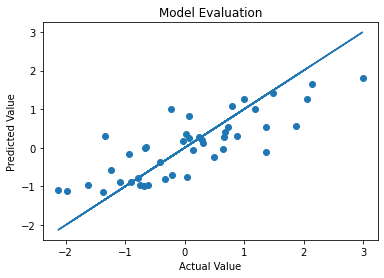

In [22]:
plt.title('Model Evaluation')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test)

In [23]:
print(model_history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


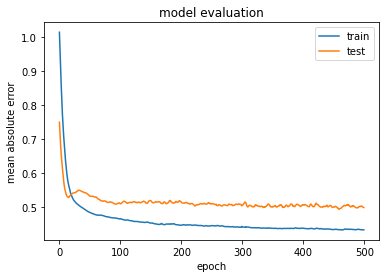

In [24]:
# Summarize history for evaluation
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.title('model evaluation')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'best')
plt.show()

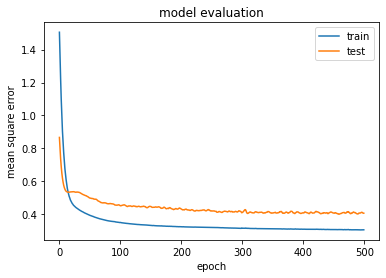

In [25]:
# Summarize history for accuracy
plt.plot(model_history.history['mse'])
plt.plot(model_history.history['val_mse'])
plt.title('model evaluation')
plt.ylabel('mean square error')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'best')
plt.show()